# Personalised Healthcare Recommendation System EDA

### Import libraries and packages

In [26]:
import pandas as pd 
import numpy as np 
import csv
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [27]:
df = pd.read_csv("health_data.csv")
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())

# ---- View the dataset ----
print("\nFirst 5 rows:")
print(df.head())

Shape of dataset: (2500, 46)

Column names: ['Patient_ID', 'Age', 'Gender', 'BMI', 'Smoking_Status', 'Alcohol_Consumption', 'Physical_Activity_Level', 'Diet_Type', 'Cholesterol', 'Glucose_Level', 'HbA1c', 'Heart_Disease_Risk', 'Diabetes_Risk', 'Health_Risk', 'Predicted_Insurance_Cost', 'Diet_Recommendation', 'Exercise_Recommendation', 'PRS_Cardiometabolic', 'PRS_Type2Diabetes', 'APOE_e4_Carrier', 'BRCA_Pathogenic_Variant', 'Family_History_CVD', 'Family_History_T2D', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Sleep_Hours', 'Sleep_Quality', 'Resting_Heart_Rate', 'HRV', 'Systolic_BP', 'Diastolic_BP', 'LDL', 'HDL', 'Triglycerides', 'CRP', 'eGFR', 'Occupation', 'Marital_Status', 'Education_Level', 'Annual_Income', 'On_Statins', 'On_Antihypertensives', 'Flu_Vaccine_Last_Year', 'PRS_Alzheimers', 'Waist_Hip_Ratio']

First 5 rows:
   Patient_ID  Age  Gender   BMI  Smoking_Status Alcohol_Consumption  \
0           1   69  Female  28.5       Ex-smoker                 Low   
1          

In [29]:
# ---- Check for missing values ----
print("\nMissing values per column:")
print(df.isnull().sum())

# ---- Basic descriptive stats ----
print("\nDescriptive statistics:")
print(df.describe(include='all'))

# ---- Check data types ----
print("\nData Types:")
print(df.dtypes)


Missing values per column:
Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Alcohol_Consumption         976
Physical_Activity_Level       0
Diet_Type                     0
Cholesterol                   0
Glucose_Level                 0
HbA1c                         0
Heart_Disease_Risk            0
Diabetes_Risk                 0
Health_Risk                   0
Predicted_Insurance_Cost      0
Diet_Recommendation           0
Exercise_Recommendation       0
PRS_Cardiometabolic           0
PRS_Type2Diabetes             0
APOE_e4_Carrier               0
BRCA_Pathogenic_Variant       0
Family_History_CVD            0
Family_History_T2D            0
Stress_Level                  0
Depression_Score              0
Anxiety_Score                 0
Sleep_Hours                   0
Sleep_Quality                 0
Resting_Heart_Rate            0
HRV                           0
Systolic_BP 

<Figure size 1200x600 with 0 Axes>

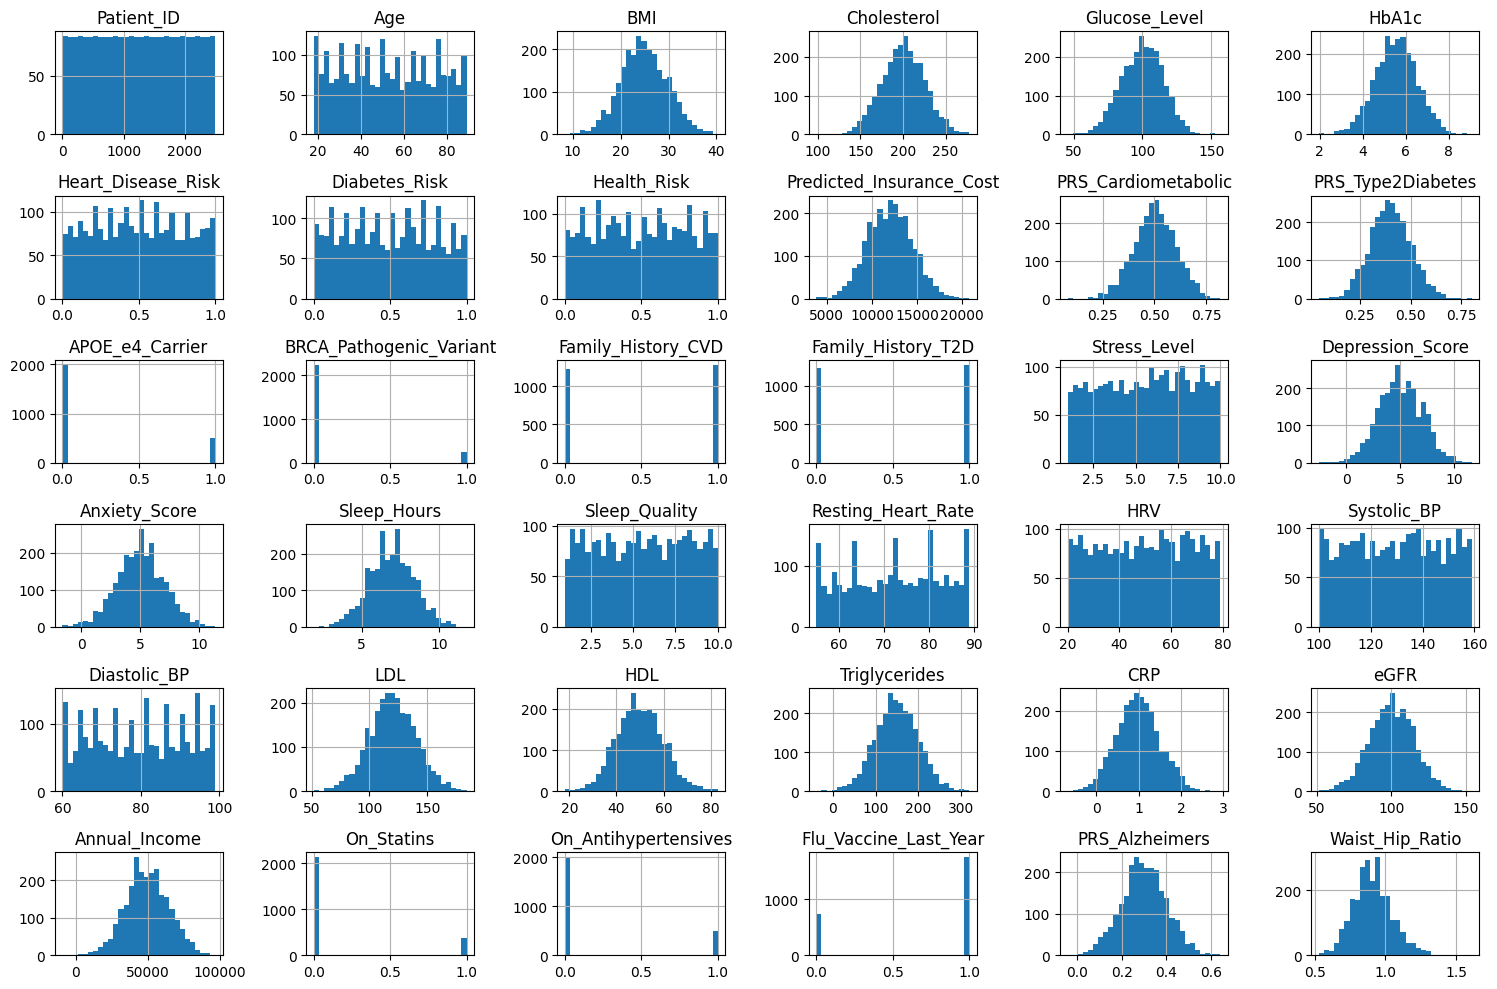

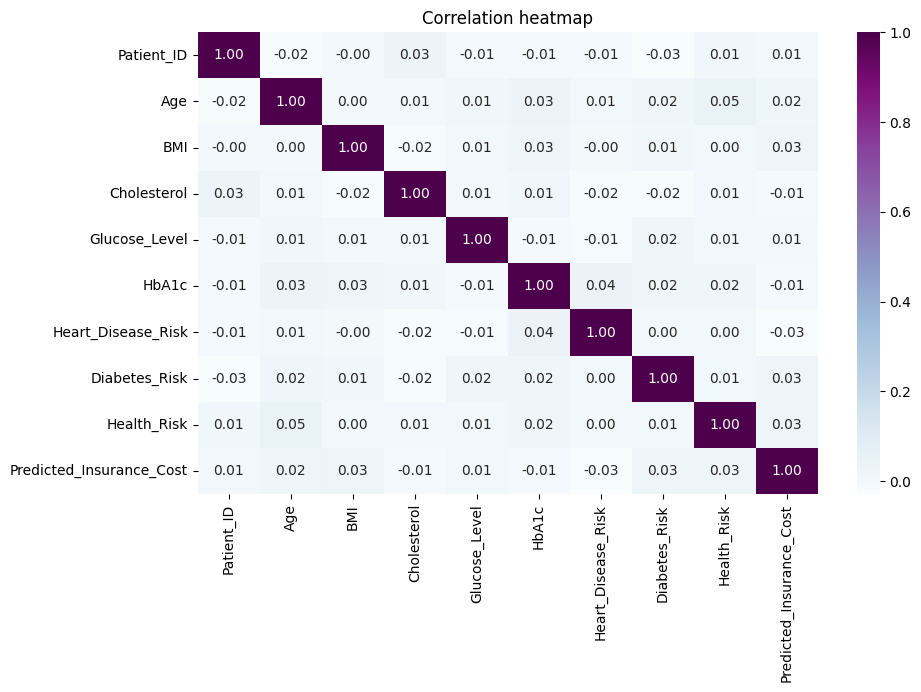

In [30]:
# ---- Visualize numeric columns ----
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()

plt.savefig('plots/Histograms.png')
plt.show()

# ---- Visualize correlations ----
plt.figure(figsize=(10, 6))

# Calculate correlation matrix for numeric columns
subset = numeric_cols[:10]  
sns.heatmap(df[subset].corr(), annot=True, cmap='BuPu', fmt=".2f")
plt.title("Correlation heatmap")

plt.savefig('plots/Heatmap.png')
plt.show()

In [31]:
# STEP 2: DATA PREPROCESSING
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ----- 1. Identify categorical & numeric columns -----
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)

# ----- 2. Handle missing values -----
# Fill numeric columns with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# ----- 3. Define X (features) and y (target) -----

target = "Heart_Disease_Risk"  
X = df.drop(columns=[target])
y = df[target]

# ----- 4. Column transformer for preprocessing -----
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# ----- 5. Split data -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Categorical Columns: ['Gender', 'Smoking_Status', 'Alcohol_Consumption', 'Physical_Activity_Level', 'Diet_Type', 'Diet_Recommendation', 'Exercise_Recommendation', 'Occupation', 'Marital_Status', 'Education_Level']
Numeric Columns: ['Patient_ID', 'Age', 'BMI', 'Cholesterol', 'Glucose_Level', 'HbA1c', 'Heart_Disease_Risk', 'Diabetes_Risk', 'Health_Risk', 'Predicted_Insurance_Cost', 'PRS_Cardiometabolic', 'PRS_Type2Diabetes', 'APOE_e4_Carrier', 'BRCA_Pathogenic_Variant', 'Family_History_CVD', 'Family_History_T2D', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Sleep_Hours', 'Sleep_Quality', 'Resting_Heart_Rate', 'HRV', 'Systolic_BP', 'Diastolic_BP', 'LDL', 'HDL', 'Triglycerides', 'CRP', 'eGFR', 'Annual_Income', 'On_Statins', 'On_Antihypertensives', 'Flu_Vaccine_Last_Year', 'PRS_Alzheimers', 'Waist_Hip_Ratio']
Training set shape: (2000, 45)
Test set shape: (500, 45)


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [40]:
# ---- STEP 1: Binning Target Variable into Categories ----
df = pd.read_csv("health_data.csv")  # <-- change to your actual dataset path
target = "Health_Risk"

# Convert continuous values to categories: Low, Medium, High
df[target] = pd.qcut(df[target], q=3, labels=["Low", "Medium", "High"])

# ---- STEP 2: Feature Engineering ----
X = df.drop(columns=[target])
y = df[target]

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Get column names after encoding
encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = numeric_cols + encoded_cols.tolist()

# Create DataFrame from transformed data
X_df = pd.DataFrame(
    X_transformed.toarray() if hasattr(X_transformed, 'toarray') else X_transformed,
    columns=all_feature_names
)

In [41]:
# ---- STEP 3: Feature Selection ----
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_df, y)
selected_features = X_df.columns[selector.get_support()]

print("\nTop 10 selected features:")
print(selected_features)


Top 10 selected features:
Index(['Patient_ID', 'Age', 'Predicted_Insurance_Cost', 'Sleep_Quality', 'CRP',
       'Gender_Female', 'Gender_Male', 'Alcohol_Consumption_nan',
       'Diet_Type_Keto', 'Occupation_Manual Laborer'],
      dtype='object')


In [42]:
# ---- STEP 4: Model Training & Evaluation ----
X_train, X_test, y_train, y_test = train_test_split(
    X_df[selected_features], y, test_size=0.2, random_state=42, stratify=y
)



----- Logistic Regression -----
Accuracy: 0.36
Precision: 0.3583383544486195
Recall: 0.36
F1 Score: 0.3556105518627356

Classification Report:
               precision    recall  f1-score   support

        High       0.36      0.27      0.31       164
         Low       0.39      0.47      0.43       169
      Medium       0.32      0.34      0.33       167

    accuracy                           0.36       500
   macro avg       0.36      0.36      0.36       500
weighted avg       0.36      0.36      0.36       500



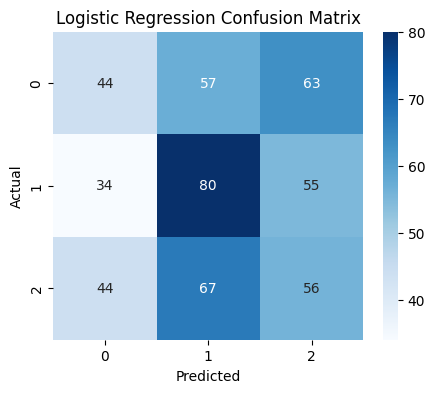

In [43]:
# --- Logistic Regression ---
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("\n----- Logistic Regression -----")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('charts/Logistic_regression.png')
plt.show()


----- Random Forest -----
Accuracy: 0.34
Precision: 0.34047245636175727
Recall: 0.34
F1 Score: 0.34019041223192603

Classification Report:
               precision    recall  f1-score   support

        High       0.38      0.37      0.37       164
         Low       0.34      0.34      0.34       169
      Medium       0.31      0.31      0.31       167

    accuracy                           0.34       500
   macro avg       0.34      0.34      0.34       500
weighted avg       0.34      0.34      0.34       500



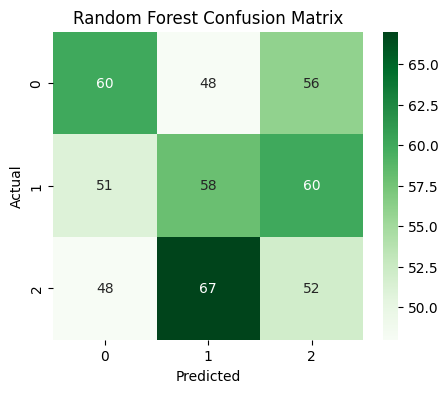

In [44]:
# --- Random Forest Classifier ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n----- Random Forest -----")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('charts/Random_forest.png')
plt.show()

In [45]:
# STEP 5: MODEL EVALUATION WITH CROSS-VALIDATION + ROC CURVES
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import numpy as np

# --- 1. Cross-Validation Scores ---
def evaluate_cv(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model.__class__.__name__} CV Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")
    return scores

evaluate_cv(log_reg, X_df[selected_features], y)
evaluate_cv(rf, X_df[selected_features], y)

LogisticRegression CV Accuracy: 0.375 (+/- 0.020)
RandomForestClassifier CV Accuracy: 0.331 (+/- 0.016)


array([0.334, 0.308, 0.318, 0.346, 0.348])

In [46]:
# --- 2. ROC Curve (One-vs-Rest for multi-class) ---
# Binarize y for ROC calculation
classes = np.unique(y)
y_bin = label_binarize(y, classes=classes)

# Train models for ROC
log_reg_ovr = OneVsRestClassifier(log_reg)
rf_ovr = OneVsRestClassifier(rf)

log_reg_ovr.fit(X_train, y_train)
rf_ovr.fit(X_train, y_train)

y_score_lr = log_reg_ovr.predict_proba(X_test)
y_score_rf = rf_ovr.predict_proba(X_test)


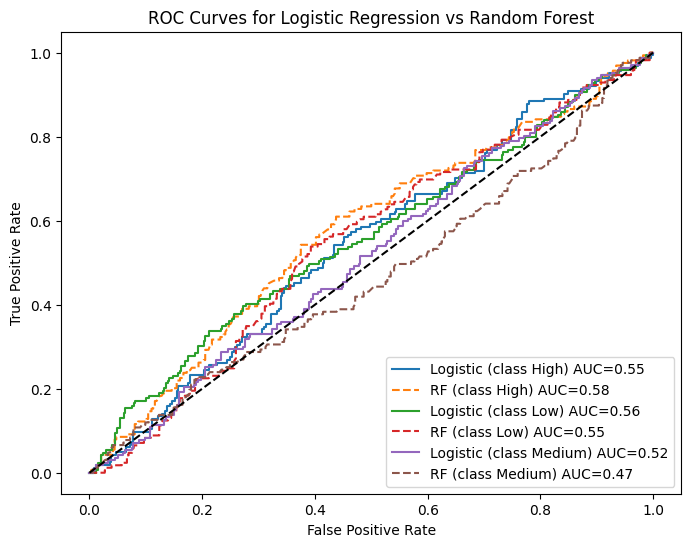

In [47]:
# --- Plot ROC curves for each class ---
plt.figure(figsize=(8, 6))

for i, class_label in enumerate(classes):
    fpr_lr, tpr_lr, _ = roc_curve(label_binarize(y_test, classes=classes)[:, i], y_score_lr[:, i])
    fpr_rf, tpr_rf, _ = roc_curve(label_binarize(y_test, classes=classes)[:, i], y_score_rf[:, i])
    plt.plot(fpr_lr, tpr_lr, label=f"Logistic (class {class_label}) AUC={auc(fpr_lr, tpr_lr):.2f}")
    plt.plot(fpr_rf, tpr_rf, linestyle='--', label=f"RF (class {class_label}) AUC={auc(fpr_rf, tpr_rf):.2f}")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Logistic Regression vs Random Forest")
plt.legend(loc="lower right")

plt.savefig("charts/ROC_curves.png")
plt.show()


Top 10 Most Important Features (Random Forest):
Patient_ID: 0.1929
Predicted_Insurance_Cost: 0.1881
CRP: 0.1806
Sleep_Quality: 0.1704
Age: 0.1649
Alcohol_Consumption_nan: 0.0260
Diet_Type_Keto: 0.0229
Occupation_Manual Laborer: 0.0211
Gender_Male: 0.0168
Gender_Female: 0.0164


/var/folders/gq/b430spm17fnb2mgr7h_t65g80000gn/T/ipykernel_30670/668292503.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette='coolwarm')


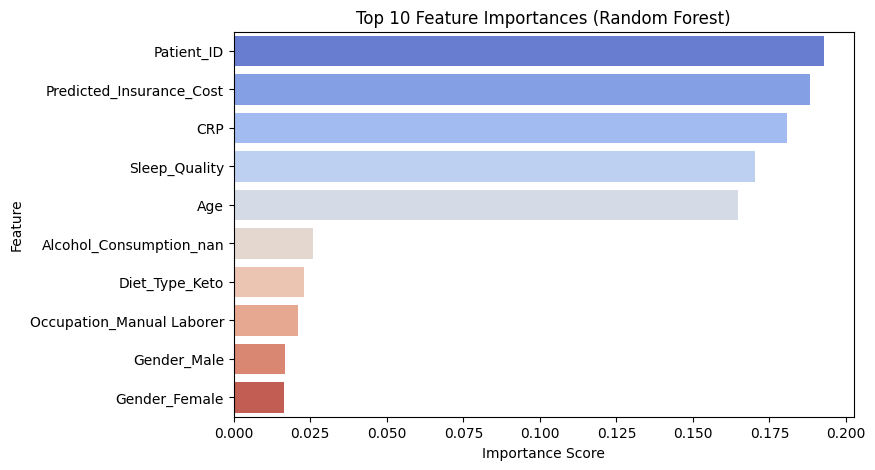

In [48]:
# STEP 6: FEATURE IMPORTANCE FROM RANDOM FOREST
import numpy as np

# Train RF again on the full training set
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Top 10 features
top_features = [selected_features[i] for i in indices[:10]]
top_importances = importances[indices[:10]]

# Print
print("\nTop 10 Most Important Features (Random Forest):")
for f, imp in zip(top_features, top_importances):
    print(f"{f}: {imp:.4f}")

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_importances, y=top_features, palette='coolwarm')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")

plt.savefig("charts/Top_features_RF.png")
plt.show()

----- XGBoost -----
Accuracy: 0.34
Precision: 0.34324033737577564
Recall: 0.34
F1 Score: 0.340757616195232

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.34      0.36       164
           1       0.35      0.34      0.35       169
           2       0.30      0.34      0.32       167

    accuracy                           0.34       500
   macro avg       0.34      0.34      0.34       500
weighted avg       0.34      0.34      0.34       500



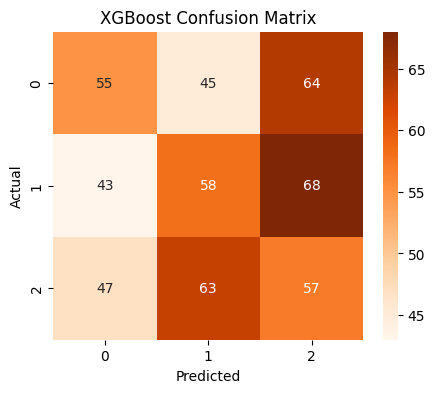

In [49]:
# STEP 7: TRAIN XGBOOST CLASSIFIER
from sklearn.preprocessing import LabelEncoder

# Encode y into numeric labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split with encoded y
X_train, X_test, y_train, y_test = train_test_split(
    X_df[selected_features], y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

from xgboost import XGBClassifier

# Train
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("----- XGBoost -----")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_xgb, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig("charts/XGBooster.png")
plt.show()

In [57]:
# ---- STEP 8: Personalized Healthcare Recommendations (Refactored) ----

# Define recommendation templates
recommendation_map = {
    "High": [
        "⚠️ High health risk detected! Consult a healthcare professional.",
        "Increase physical activity to at least 30 mins/day.",
        "Adopt a balanced, low-sugar diet with high fiber.",
        "Schedule regular health check-ups."
    ],
    "Medium": [
        "⚠️ Moderate health risk. Consider lifestyle adjustments.",
        "Start moderate exercise 3–4 times a week.",
        "Monitor your diet and reduce processed foods.",
        "Keep track of health indicators like BP & glucose."
    ],
    "Low": [
        "✅ Low health risk. Keep up the healthy habits!",
        "Continue regular exercise and balanced diet.",
        "Get yearly check-ups to maintain your health."
    ]
}

def generate_recommendations(prediction_label):
    """
    Fetch personalized recommendations from the map based on prediction.
    """
    return recommendation_map.get(prediction_label, ["⚠️ No recommendations available."])

def predict_and_recommend(model, X_test, index):
    """
    Predict risk level for a specific row in X_test and print recommendations.
    
    Parameters:
    - model: trained classifier (e.g., RandomForest)
    - X_test: DataFrame containing test features
    - index: integer index of the sample row to test
    """
    sample = X_test.iloc[index].values.reshape(1, -1)  # reshape to 2D
    predicted_risk = model.predict(sample)[0]

    print(f"\n🧪 Sample Index: {index}")
    print(f"Predicted Risk: {predicted_risk}")
    print("Personalized Recommendations:")
    for rec in generate_recommendations(predicted_risk):
        print("-", rec)

# ---- Call the function with desired sample index ----
predict_and_recommend(rf, X_test, 1)


🧪 Sample Index: 1
Predicted Risk: Low
Personalized Recommendations:
- ✅ Low health risk. Keep up the healthy habits!
- Continue regular exercise and balanced diet.
- Get yearly check-ups to maintain your health.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [58]:
import os
import joblib

os.makedirs("models", exist_ok=True)

# Save trained model
joblib.dump(rf, "models/personalised_health_model.pkl")

# Save your preprocessor (e.g., StandardScaler)
joblib.dump(preprocessor, "models/preprocessor.pkl")

# Save your input feature columns
joblib.dump(X.columns.tolist(), "models/feature_names.pkl")

['models/feature_names.pkl']